In [40]:
from data import Data
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from math import sqrt
# Set up our data management object
d = Data()

In [4]:
# Collect the data from each of the sources
sparcGalaxies = d.getGalaxyData("data/Sparc/Rotmod_LTG/")
xueSofueGalaxies = d.getGalaxyData("data/XueSofue/")

In [5]:
# Get the galaxies we want from each source
NGC5371 = np.array(sparcGalaxies['NGC5371_rotmod'])
MWXueSofue = np.array(xueSofueGalaxies['MW_lum'])

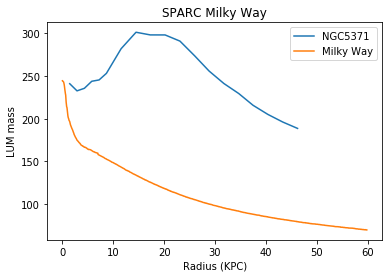

In [42]:
# Plot both galaxies side by side
NGC5371_rad = NGC5371[:,0]
NGC5371_gas = NGC5371[:,3]
NGC5371_disk = NGC5371[:,4]
NGC5371_bulge = NGC5371[:,5]

NGC5371_lum = np.sqrt(NGC5371_gas*NGC5371_gas + NGC5371_disk*NGC5371_disk + NGC5371_bulge*NGC5371_bulge)

kpc_MW = MWXueSofue[:,0]
vobs_MW = MWXueSofue[:,1]
plt.plot(NGC5371_rad, NGC5371_lum, kpc_MW, vobs_MW)
plt.legend(['NGC5371', 'Milky Way', 'cubic'], loc='best')
plt.xlabel('Radius (KPC)')
plt.ylabel('LUM mass')
plt.title('SPARC Milky Way')
plt.show()

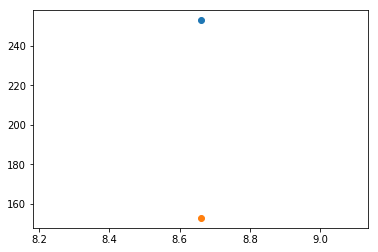

In [60]:
# Interpolation Test
mw_function = interp1d(kpc_MW, vobs_MW, kind='cubic')

NG_rad = NGC5371_rad[5]
NG_y = NGC5371_lum[5]

plt.plot(NG_rad, NG_y, 'o', NG_rad, mw_function(NG_rad), 'o')
plt.show()

In [61]:
print(mw_function(8.66))

152.79448086543678
